# Описание проекта
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Приоритизация гипотез.

### Описание данных

Файл /datasets/hypothesis.csv.

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Задачи

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Укажить, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Импорт библиотек и открытие csv файла с данными.

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

In [2]:
def path_csv(pth1,pth2):
    if os.path.exists(pth1):
        data = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        data = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    return data

In [3]:
hypothesis_df = path_csv('/datasets/hypothesis.csv','hypothesis.csv')

Применение фреймворка ICE для приоритизации гипотез.

In [4]:
hypothesis_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis_df['ICE'] = (hypothesis_df['Impact']*hypothesis_df['Confidence'])/hypothesis_df['Efforts']
hypothesis_df[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применение фреймворка RICE для приоритизации гипотез.

In [6]:
hypothesis_df['RICE'] = (hypothesis_df['Reach']*hypothesis_df['Impact']*hypothesis_df['Confidence'])/hypothesis_df['Efforts']
hypothesis_df[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При использовании замены метода ICE на RICE в расчет берется также параметр Reach для оценки охвата пользователей которых затронет изменение. В Соответсвии с формулой чем выше параметр Reach тем более приоритетней становится гипотиза по сравнению с оценкой мотодом ICE.

## Анализ A/B-теста

### Описание данных

Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Задача

Произвести оценку А/B тестирования.

#### открытие и предобработка csv файлов.

In [7]:
orders = path_csv('/datasets/orders.csv','orders.csv')
visitors = path_csv('/datasets/visitors.csv','visitors.csv')

In [8]:
orders
orders.info()
print('Количество дубликатов:', orders.duplicated().sum())

orders[['visitorId','group']].groupby(by='visitorId',as_index=False).sum().query('("AB" in group) or ("BA" in group)').count()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов: 0


visitorId    35
group        35
dtype: int64

In [9]:
visitors
visitors.info()
print('Количество дубликатов:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов: 0


В таблице orders необходимо изменить имена столбцов  transactionId и visitorId в transaction_id и visitor_id соответсвенно и заменить тип столбца date на datetime.

В таблице visitors также необходимо привести столбец date к типу datetime.

Стоит отметить что исходя из первой таблицы есть 35 пользователей которые попали в обе группы.

In [10]:
visitors['date'] = pd.to_datetime(visitors['date']).dt.date
orders['date'] = pd.to_datetime(orders['date']).dt.date
orders.rename(columns = {'transactionId':'transaction_id','visitorId':'visitor_id'},inplace=True)

#### График кумулятивной выручки по группам.

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [12]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max',
      'transaction_id' : 'nunique', 
      'visitor_id' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated 

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [13]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
.agg({'date' : 'max',
      'group' : 'max',
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [14]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'График кумулятивной выручки по группам.')

Text(0.5, 0, 'Дата')

Text(0, 0.5, 'рост комулятивной вырочки')

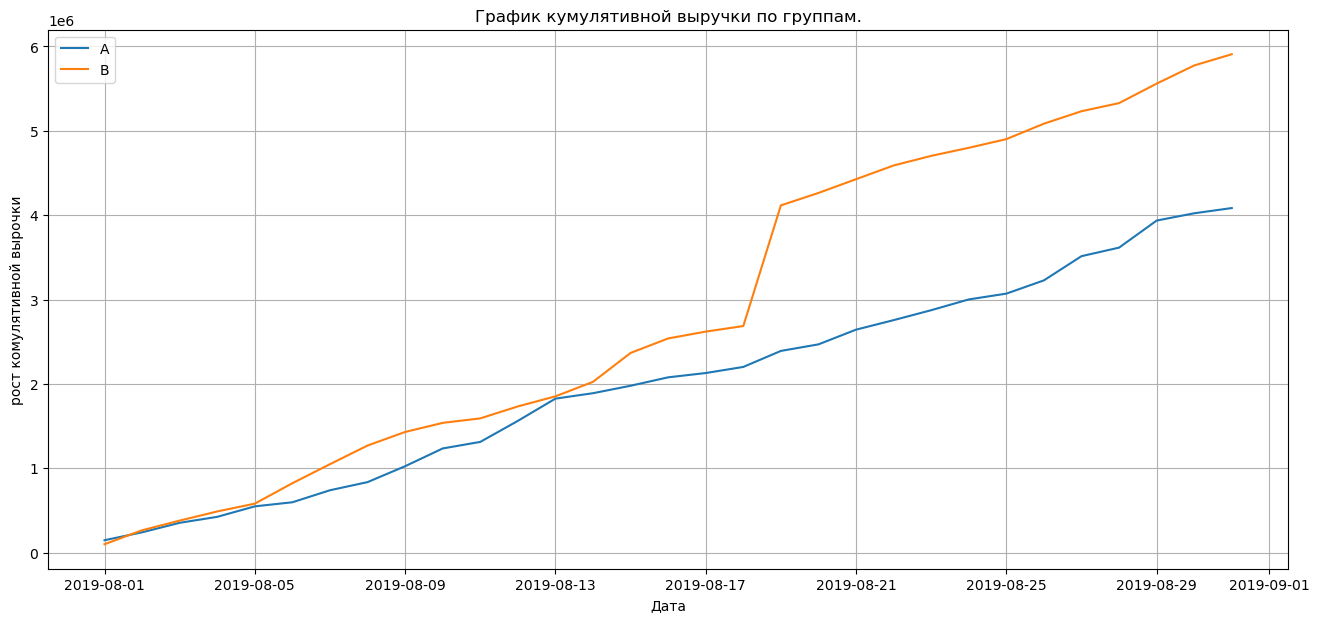

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(16,7))
plt.grid()
plt.title('График кумулятивной выручки по группам.')
plt.xlabel('Дата')
plt.ylabel('рост комулятивной вырочки')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.show()

Выручка группы В после 18.08.2019 числа резко выросла. Возможно это связанно с появлением дорогих покупок в выборке.
Также у группы В выручка росла с небольшим опережением по отношению к группе А.

#### График кумулятивного среднего чека по группам.

<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'График кумулятивного среднего чека по группам.')

Text(0.5, 0, 'Дата')

Text(0, 0.5, 'рост комулятивного среднего чека')

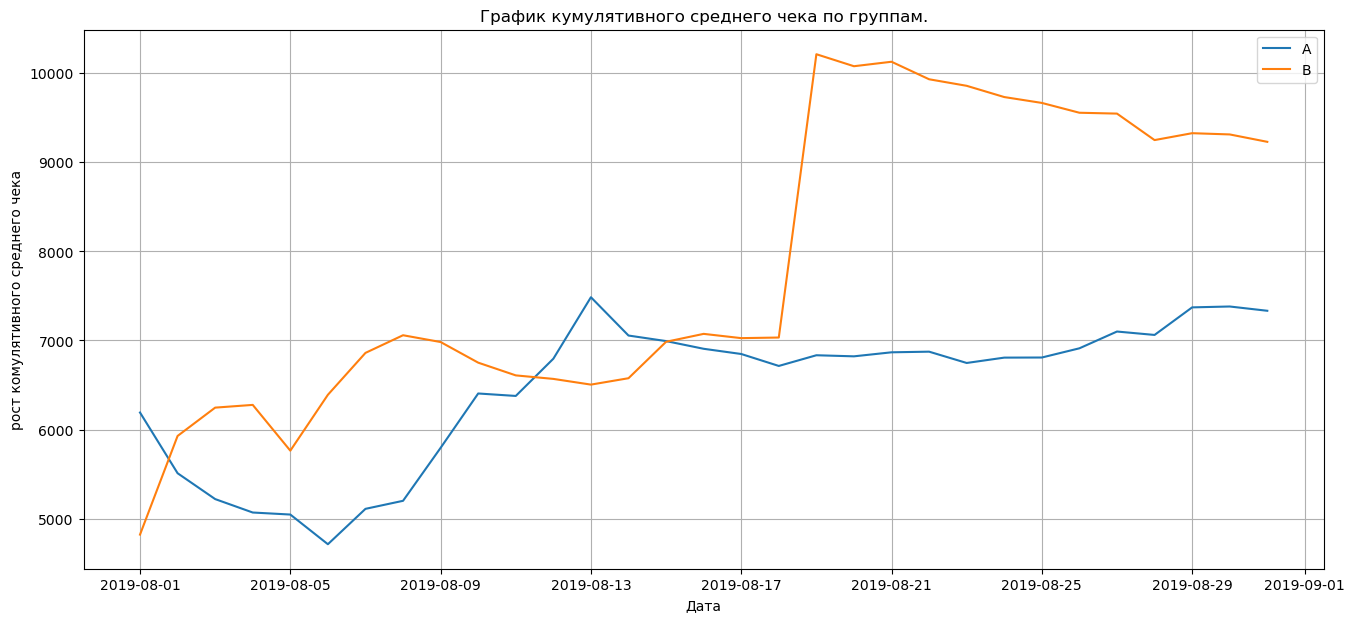

In [16]:
plt.figure(figsize=(16,7))
plt.grid()
plt.title('График кумулятивного среднего чека по группам.')
plt.xlabel('Дата')
plt.ylabel('рост комулятивного среднего чека')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

Как и в графике по выручке в группе В наблюдается резкий всплеск поле 18 числа. 

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A.')

Text(0.5, 0, 'Дата')

Text(0, 0.5, 'Отношение среднего чека группы А к группе В')

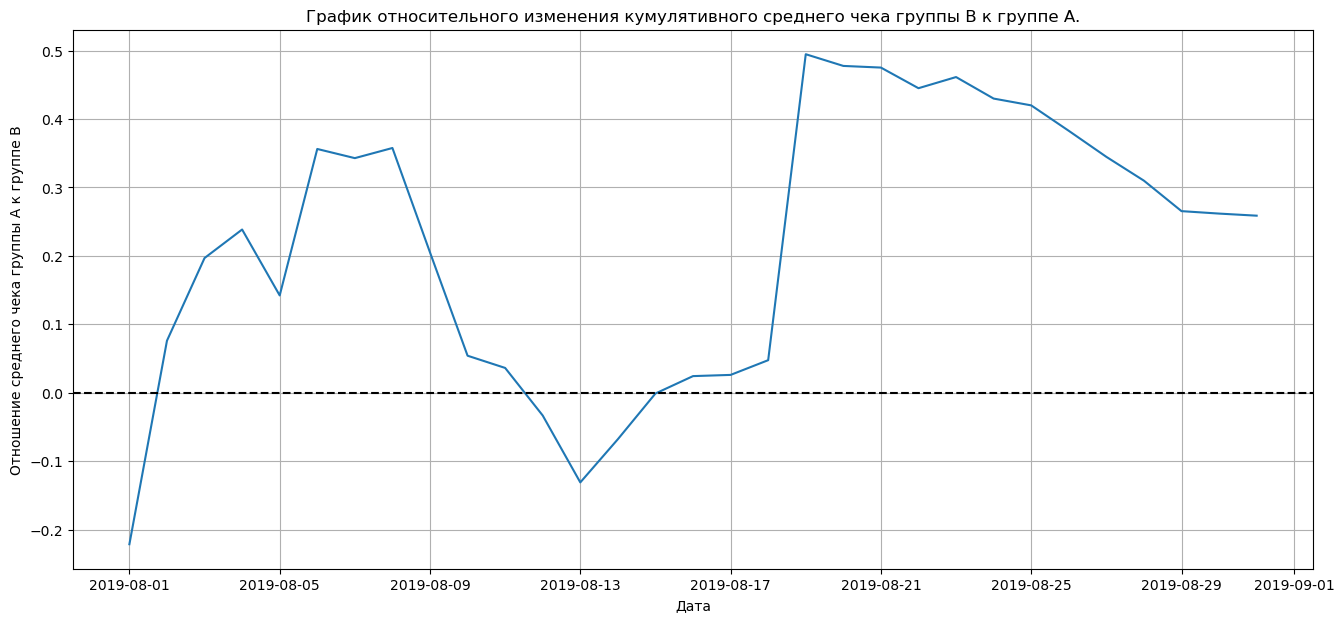

In [17]:
plt.figure(figsize=(16,7))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы А к группе В')


# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

В нескольких точках график различия между сегментами резко «скачет». Эти точки соответствуют выбросам в предыдущих графиках.

#### График кумулятивного среднего количества заказов на посетителя по группам

<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'График кумулятивного среднего количества заказов на посетителя по группам')

Text(0.5, 0, 'Дата')

Text(0, 0.5, 'Кумулятивное среднее количества заказов')

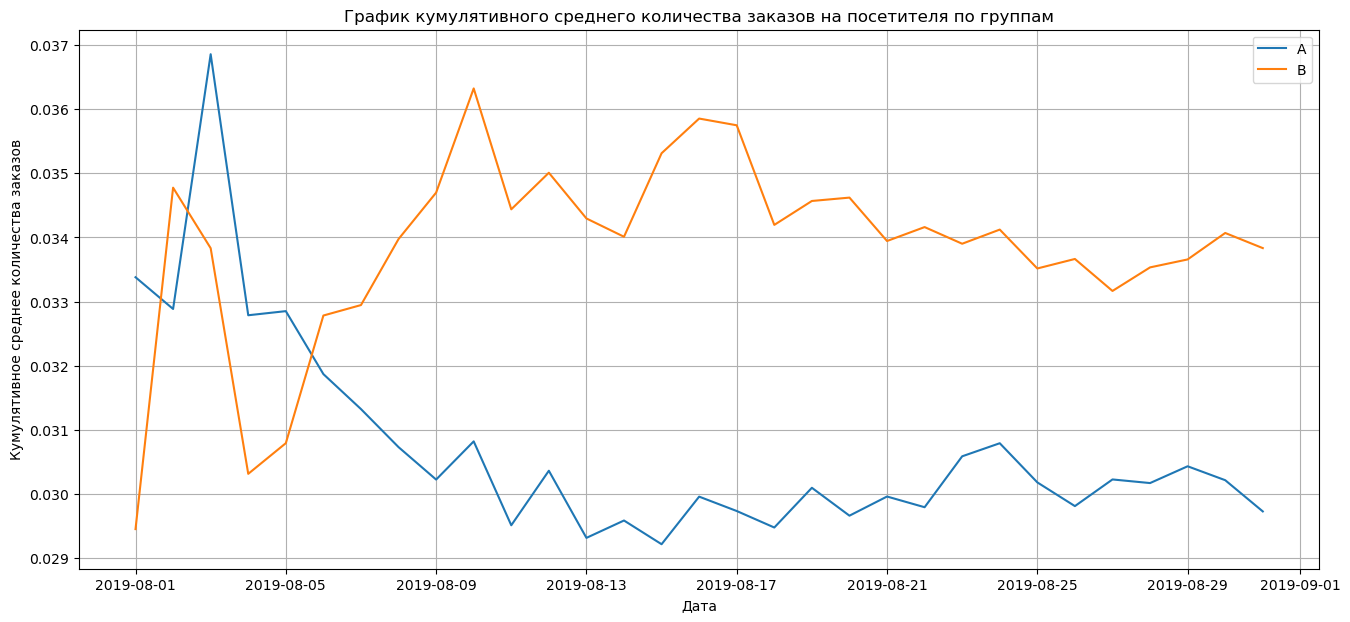

In [18]:
plt.figure(figsize=(16,7))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количества заказов')

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()



В начале группы колебались симетрично, но затем конверсия группы В значительно выросла а групп А просела по конверсии. 

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')

Text(0.5, 0, 'Дата')

Text(0, 0.5, 'Отношение кумулятивного среднего количества заказов между группами')

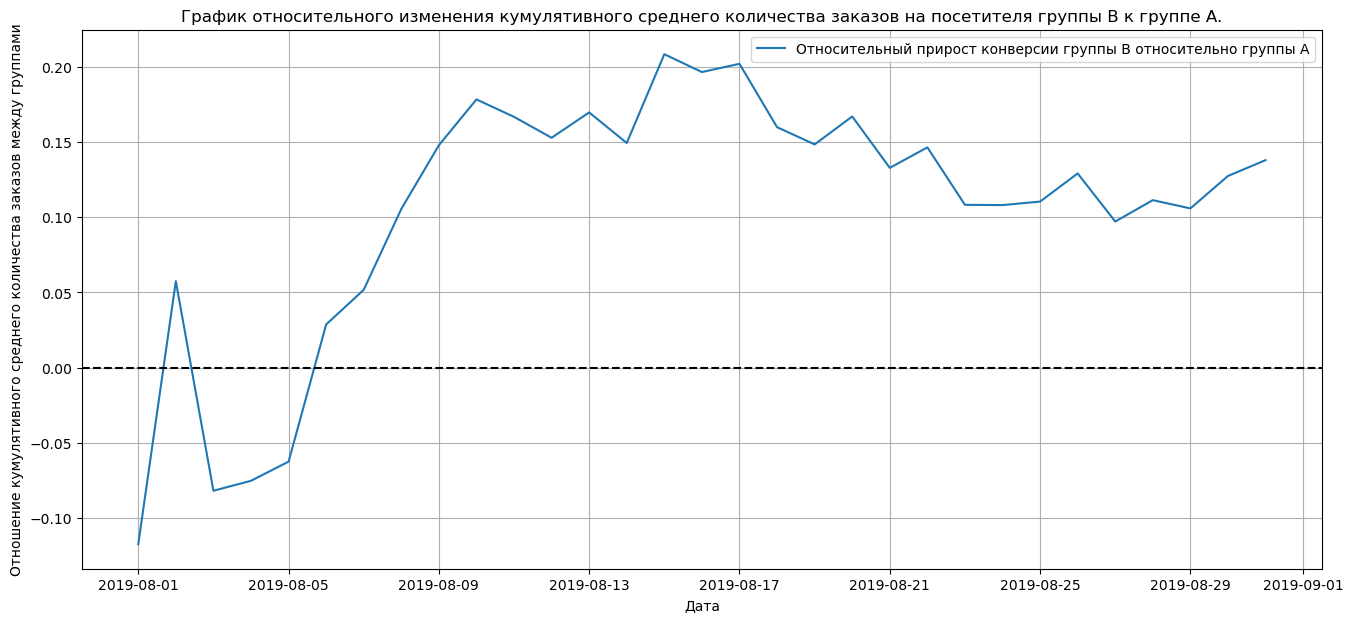

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16,7))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивного среднего количества заказов между группами')

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

Прирост конверсии группы В значительно вырос после колебаний более чем на 15%, это достаточно высокий уровень роста. Стоит проанализировать аномалии найденные в графиках.

#### Точечный график количества заказов по пользователям.

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5
393   1614305549               4
114    457167155               4
619   2587333274               4
340   1404934699               3
937   3908431265               3


<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям.')

Text(0.5, 0, 'Пользователи')

Text(0, 0.5, 'Количество заказов')

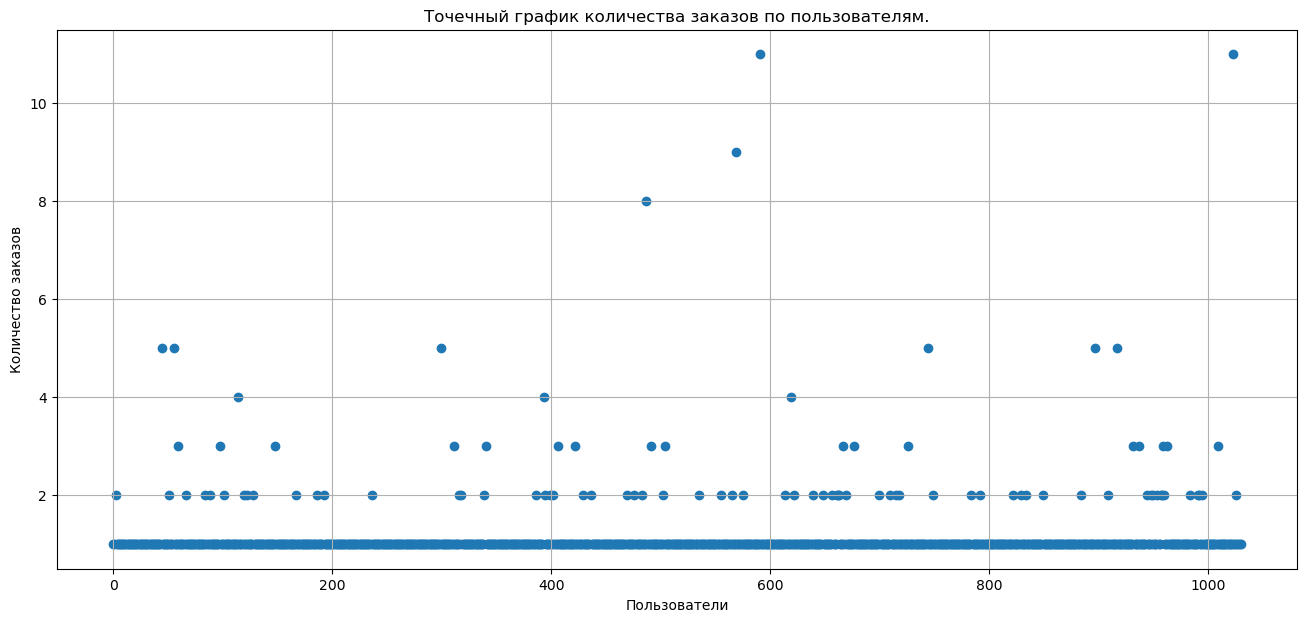

In [20]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(15))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(16,7))
plt.grid()
plt.title('Точечный график количества заказов по пользователям.')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transaction_id']) 

Большинство пользователей совершили не более 2ух покупок, но есть и пользователи совершившие более 5 покупок.

#### Подсчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [21]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя:
np.percentile(ordersByUsers['transaction_id'], [90,91,95, 99])

array([1., 2., 2., 4.])

Не более 5% пользователей заказывали болеше 2ух заказов. Можно установить верхнюю границу на уровне трех заказов и отсеять аномальных пользователей.

#### Точечный график стоимостей заказов

<Figure size 1600x700 with 0 Axes>

Text(0.5, 1.0, 'Точечный график стоимостей заказов.')

Text(0.5, 0, 'Пользователи')

Text(0, 0.5, 'Количество заказов')

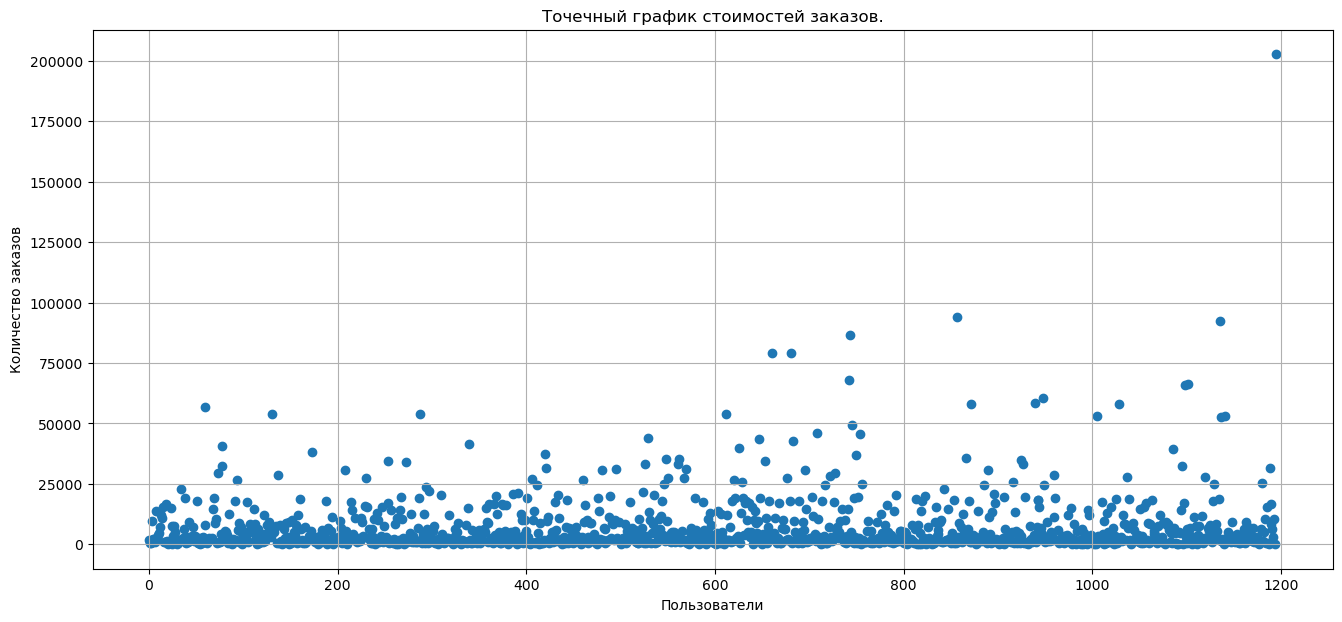

In [22]:

plt.figure(figsize=(16,7))
plt.grid()
plt.title('Точечный график стоимостей заказов.')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
orders_clr = orders[orders['revenue']<1294500]
x_values = pd.Series(range(0,len(orders_clr['revenue'])))
plt.scatter(x_values, orders_clr['revenue'])

Точечный график стоимостей заказов показывает показывает что большинство заказов лежат достаточно кучно но есть некоторое количество выбросов, некоторые из них достоаточно существенны.

#### Подсчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных пользователей.

In [23]:
np.percentile(orders['revenue'], [90, 95, 99])


array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28000. Можно установить верхнюю границу стоимости заказа на уровне 28000 и отсеять аномальные заказы.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [24]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'transaction_id']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные <b>sampleA</b> и <b>sampleB</b>, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [26]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [27]:
print('Уровень значимости:',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Отношение среднего количества заказов между группами:'"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Уровень значимости: 0.01679
Отношение среднего количества заказов между группами:0.138


P-value(уровень значимости) равен 0.01679 и  больше 0.05 . Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем.

Относительный выйгрыш группы B равен 13.8%

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Посчитаем статистическую значимость различий в среднем чеке на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем между группами есть.

In [28]:
print('Уровень значимости:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение среднего чека между группами :','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Уровень значимости: 0.729
Отношение среднего чека между группами : 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

#### Очистка данных от аномалий.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
63


#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по очищенным данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Уровень значимости:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение среднего количества заказов между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Уровень значимости: 0.018
Отношение среднего количества заказов между группами: 0.148


Результаты по среднему количеству заказов практически не изменились. 

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Посчитаем статистическую значимость различий в среднем чеке на пользователя между группами по очищенным данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем между группами есть.

In [31]:
print(
    'Уровень значимости:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Отношение среднего чека между группами :',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Уровень значимости: 0.977
Отношение среднего чека между группами : -0.017


P-value увеличился, но и разница между сегментами  существенно сократилась с 26% до 1%.
Выбросы сильно повлияли на разницу в среднем чеке.



#### Результаты и выводы.

Исходя из того что нет статистического значимого различия между сырыми и очищенными данными можно принять графики относительного изменения кумулятивного среднего чека  и выручки группы B к группе A отражающими реальную картину разницы между группами.
 
На основании графика различия среднего количества заказов на посетителя можно сделать вывод группа B значительно привосходит группу А.

Можно  остановить тест и  зафиксировать победу группы В.
